# Financial bootstrapping

### 0. 종목 선정
<hr><br>
카카오(035720)  


### 1.  필요 모듈, 라이브러리 설치
<hr>

In [64]:
!pip3 install pykrx
import pykrx
from pykrx import stock

In [65]:
import math
import numpy as np
import pandas as pd

### 2. 종목 정보를 가져오는 함수: getStockInfo
<hr>

입출력 관계: (시작일, 마감일, 종목코드) -> (종목 정보) 

##### 2.1 함수 구현 코드

In [66]:
def getStockInfo(initialDate, finalDate, stockCode):
    return stock.get_market_ohlcv(initialDate, finalDate, stockCode) 

##### 2.2 출력 데이터 확인

In [67]:
# 분석 종목: 카카오 (코드: 035720)
# 분석 기간: 2022.1.1~2022.12.31
rawData = getStockInfo("20220101", "20221231", "035720") 
rawData

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2022-01-03,113500,117000,113000,114500,1846049,212280750000,1.78
2022-01-04,114000,114500,111000,111500,2396207,268925764000,-2.62
2022-01-05,111000,111000,105000,105500,5108428,545379775500,-5.38
2022-01-06,102500,103000,99900,100000,7120428,716638704800,-5.21
2022-01-07,100000,101500,99800,100000,3962672,398238832200,0.00
...,...,...,...,...,...,...,...
2022-12-23,54000,54300,53100,53400,1339673,71753381000,-3.09
2022-12-26,53400,53800,52700,53600,988777,52802294200,0.37
2022-12-27,53900,54700,53600,54400,1226474,66426954300,1.49


##### 2.3 데이터 전처리: 종가 열만 남기기

In [68]:
# 종가만 가져오기
df = pd.DataFrame(rawData['종가'])
df = df.rename(columns={'종가':'close'}) # 종가변수 이름을 close로 변경
df

,close
날짜,
2022-01-03,114500
2022-01-04,111500
2022-01-05,105500
2022-01-06,100000
2022-01-07,100000
...,...
2022-12-23,53400
2022-12-26,53600
2022-12-27,54400


카카오의 2022년 주가 추이는 연초 114500원 고점에서 연말 53100원으로 하락 추세를 보였다. 

##### 2.4 데이터 전처리: 일 상승률 계산 후 새로운 열로 추가

In [69]:
df['return']=np.log(df['close']/df['close'].shift(1)) # %변화 보기 위해, log x_t+1 - log x_t 사용
df

,close,return
날짜,,
2022-01-03,114500,NaN
2022-01-04,111500,-0.026550
2022-01-05,105500,-0.055314
2022-01-06,100000,-0.053541
2022-01-07,100000,0.000000
...,...,...
2022-12-23,53400,-0.031339
2022-12-26,53600,0.003738
2022-12-27,54400,0.014815


### 3. 가상의 상승률 데이터 만들기
<hr>

원본 데이터 df['return']로부터 데이터를 251회 무작위 추출하여 가상의 상승률 리스트 데이터를 만든다. 

In [ ]:
# 12월 29일 종가를 기준으로 향후 251일 이후의 수익률 부트스트래핑
returns_virtual = np.random.choice(df['return'], size=251) # 비복원 추출 / 복원 추출 중 적절히 사용위해 random.choice 사용 
returns_virtual

### 4. 기준 시작가 설정
<hr>

기준 시작가는 주어진 데이터의 마지막 종가, 2022년 12월 29일 종가로 설정한다.

In [71]:
# 12월 29일 종가를 부트스트래핑 초기 기준가로 저장
price_initial = df.iloc[-1,0]

### 5. 가상의 종가 리스트를 출력하는 함수: getListOfPrices
<hr>

입출력 관계: (기준 시작 가격, 상승률 리스트) -> (가격들 리스트) 

##### 5.1 함수 구현 코드

In [72]:
def getListOfPrices(price:int, returns:list)->list:
    price_list = []
    price_virtual = price
    for r in returns:
        # 수익률이 NaN인 경우 상승률 없음(r=0, 가격 그대로)을 가정 
        if np.isnan(r):
            r = 0
        # 카카오 주가의 호가단위 100원을 반영하기 위해 floor 메소드를 적절히 사용
        price_virtual = math.floor((price_virtual * math.exp(r))/100)*100 
        price_list.append(price_virtual)
    return price_list

##### 5.2 출력 데이터 확인: 가상의 종가 리스트

In [ ]:
prices_virtual = getListOfPrices(price_initial, returns_virtual)
prices_virtual

### 6. 1년 간(D+1, ... ,D+251) 가상의 주가 흐름을 Line plot으로 그려보기 
<hr>

##### 6.1 Plot을 그리기 위한 라이브러리 설치


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

##### 6.2 1년 간 가상의 주가 흐름 line plot 

(-1.0, 251.0)

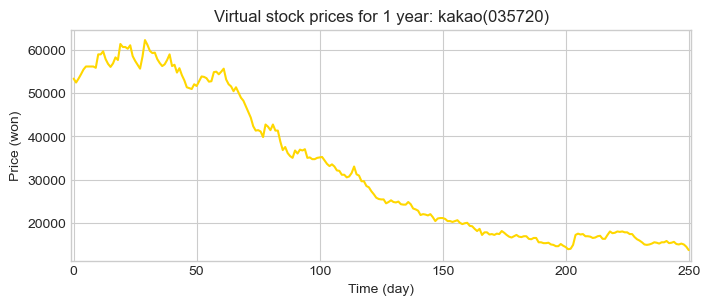

In [75]:
plt.figure(figsize=(8,3))
plot = plt.axes()

# 플롯의 입력값은 5.2에서의 가상의 종가 리스트
# 색상은 카카오의 브랜드 컬러인 짙은 노란색으로 설정
plot.plot(prices_virtual, 'gold')
plt.title("Virtual stock prices for 1 year: kakao(035720)")
plt.xlabel('Time (day)')
plt.ylabel('Price (won)')
plt.xlim([-1, 251])

원본 데이터인 2022년 주가 흐름(연초 114500원에서 연말 53100원으로 크게 하락)과 유사하게, 2022년 마지막 종가를 기준가로 한 1년 간의 가상의 주가 흐름 역시 연초 고점, 연말 저가로 하락 추이를 나타낸다.

##### 6.3 1년 간 실제 주가 추이 Line plot

Text(0, 0.5, 'Price (won)')

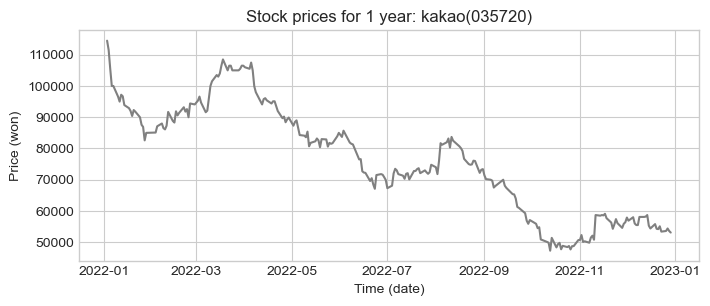

In [90]:
plt.figure(figsize=(8,3))
plot = plt.axes()

# 플롯의 입력값은 5.2에서의 가상의 종가 리스트
# 색상은 카카오의 브랜드 컬러인 짙은 노란색으로 설정
plot.plot(df['close'], 'gray')
plt.title("Stock prices for 1 year: kakao(035720)")
plt.xlabel('Time (date)')
plt.ylabel('Price (won)')

- 카카오의 실제 주가 추이는 상승/하락 구간이 좀 더 국소적으로 집중된 경향성을 띈다. (상승 상승 상승... 하락 하락 하락 ... ) 
- 반면 원본 상승률 데이터로부터 무작위 추출된 상승률 데이터로 얻은 가상의 결과는 대체로 상승과 하락이 좀 더 고르게 섞여있으므로 (하락 하락 상승 하락 상승 하락 ...) 실제보다 하락률이 더 큰 경향성을 보인다.  

### 7. D+251 가상의 예측 종가들 만들기
<hr>

해당 시행을 1000번, 10000번 반복하여 251일째 (즉, 대략적인 영업일 기준 2023년 12월 31일)의 예측 종가를 히스토그램으로 그려보기

##### 7.1 가상의 상승률 리스트를 생성하는 함수: getListOfReturns

입출력 관계: (251개 상승률 리스트) -> (무작위 추출된 215개 가상의 상승률 리스트)

In [92]:
def getListOfReturns(returns):
    return np.random.choice(returns, size=251)

##### 7.2 가상의 D+251 (마지막 거래일) 종가들을 출력하는 함수

입출력 관계: (생성하고자 하는 리스트의 원소 개수) -> (입력한 개수만큼 D+251 가상의 종가들을 담은 리스트)

In [93]:
def getListOfFinalPrices(num):
    final_prices = []
    for i in range(num):
        # 상승률 리스트는 매 시도마다 원본 데이터 df['return']으로부터 새롭게 추출됨
        returns = getListOfReturns(df['return'])
        # 251일째 가격을 얻기 위해 인덱스 [-1] 이용
        price_final = getListOfPrices(price_initial, returns)[-1]
        final_prices.append(price_final)
    return final_prices

### 8.  1000개의 가상의 종가들로 히스토그램 그리기
<hr>

##### 8.1 1000개의 가상의 종가 출력하기

In [ ]:
# 1000번 반복해 251일째 종가 1000개의 리스트를 얻음 
prices_final_1000 = getListOfFinalPrices(1000)
prices_final_1000

In [95]:
# 리스트 원소 개수 1000개인지 확인
len(prices_final_1000)

1000

##### 8.2 1000개의 가상의 종가 히스토그램

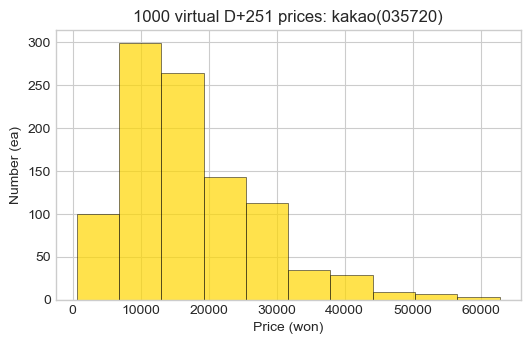

In [96]:
plt.figure(figsize=(6,3.5))
plt.hist(prices_final_1000, color = 'gold', alpha=0.7, edgecolor = 'black', linewidth = 0.5)
plt.title("1000 virtual D+251 prices: kakao(035720)")
plt.xlabel('Price (won)')
plt.ylabel('Number (ea)')
plt.show()

- 1년 후 가상의 종가들은 대체로 기준가보다 크게 하락한 10000 ~ 30000원 범위에 머물지만 매우 드물게 기준가보다 상승한 60000 ~ 70000원인 경우도 존재한다.

### 9.  10000개의 가상의 종가들로 히스토그램 그리기
<hr>

##### 9.1 10000개의 가상의 종가 출력하기

In [ ]:
prices_final_10000 = getListOfFinalPrices(10000)
prices_final_10000

In [98]:
len(prices_final_10000)

10000

##### 9.2 10000개의 가상의 종가 히스토그램

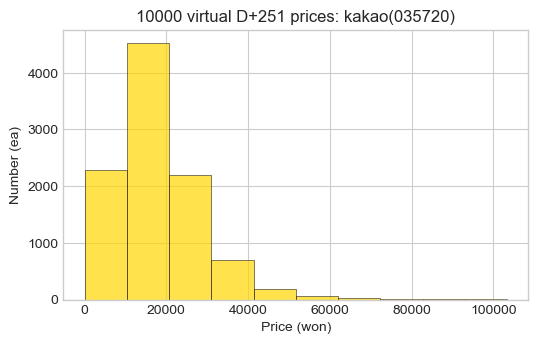

In [99]:
plt.figure(figsize=(6,3.5))
plt.hist(prices_final_10000, color = 'gold', alpha=0.7, edgecolor = 'black', linewidth = 0.5)
plt.title("10000 virtual D+251 prices: kakao(035720)")
plt.xlabel('Price (won)')
plt.ylabel('Number (ea)')
plt.show()

- 1년 후 가상의 종가들은 대체로 기준가보다 크게 하락한 10000 ~ 30000원 범위에 머물지만 매우 드물게 기준가보다 상승한 60000원 이상인 경우도 존재한다. 
- 10000번 반복시행의 경우 1000번 반복시행의 경우보다 극히 낮은 확률로 매우 극단적인 사례(저점으로는 10000원 이하, 고점으로는 80000원 이상)가 존재하기도 한다.